In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import xroms
import matplotlib.pyplot as plt
import datetime

In [2]:
roms_file = 'http://icoast.rc.ufl.edu/thredds/dodsC/ian/L1_BEST_AVAILABLE/ocean_his.nc'
run_name = 'L1_20230123'

ds_mod = xroms.open_netcdf(roms_file)
time_ini_model = ds_mod.ocean_time.values[0]
time_end_model = ds_mod.ocean_time.values[-1]

[-83.65] [25.7]
[-84.275] [27.345]
[-82.931] [27.589]


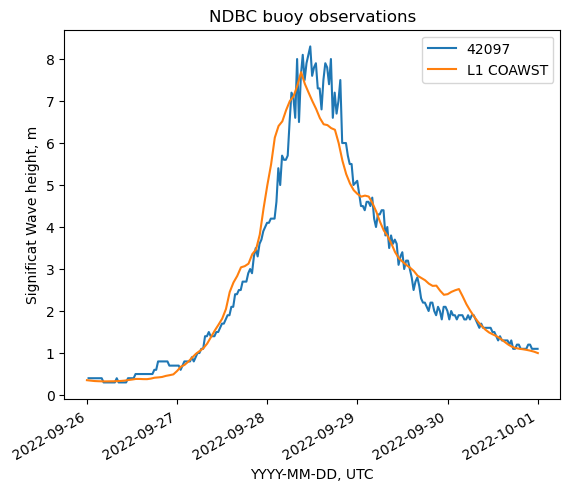

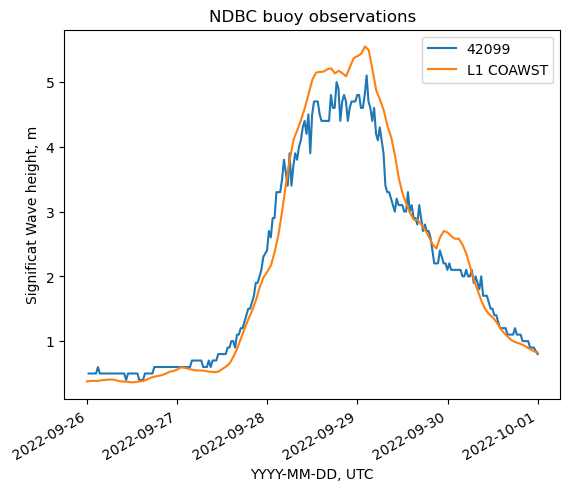

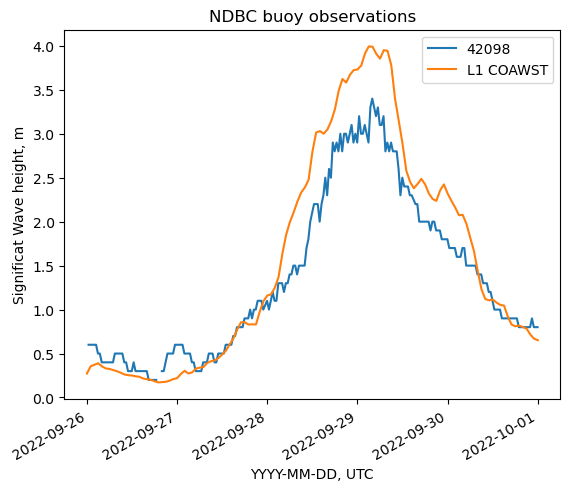

In [3]:
buoys = "42097","42099","42098"

for buoy in buoys:
     # Open dataset
     url ='https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/' + str(buoy) + '/' + str(buoy) + 'h9999.nc'
     ds = xr.open_dataset(url)
     lat1 = ds.latitude.values
     lon1 = ds.longitude.values
     print(lon1,lat1)
     ds = ds.sel(time=slice(time_ini_model,time_end_model)) ####<<<<<We can us the datetime object to subset. no need to convert to strings. 

     HWavel = ds_mod.Hwave.xroms.sel2d(lon1, lat1)

     plt.figure()
     ds.wave_height.plot()
     HWavel.plot()
     plt.title('NDBC buoy observations')
     plt.ylabel('Significat Wave height, m')
     plt.xlabel('YYYY-MM-DD, UTC')
     plt.gca().legend([buoy, "L1 COAWST"])
     fig_name = buoy + '_v2_' + run_name + '.png'
     plt.savefig(fig_name)

In [9]:
from wavespectra import read_ww3, read_swan, read_ndbc, read_netcdf
from wavespectra.input.swan import read_swans
wave_url = r"https://icoast.rc.ufl.edu/thredds/fileServer/ian/L1_BEST_AVAILABLE/l1_gomsab_2km_swan_rst.dat-064"
wave_url = r'http://icoast.rc.ufl.edu/thredds/dodsC/ian/L1_BEST_AVAILABLE/l1_gomsab_2km_swan_rst.dat-064'
wave_url = r'https://icoast.rc.ufl.edu/thredds/catalog/ian/L1_BEST_AVAILABLE/catalog.html?dataset=ian/L1_BEST_AVAILABLE/l1_gomsab_2km_swan_rst.dat-024'
dsw = read_swan( wave_url )
dsw

FileNotFoundError: [Errno 2] No such file or directory: 'https://icoast.rc.ufl.edu/thredds/catalog/ian/L1_BEST_AVAILABLE/catalog.html?dataset=ian/L1_BEST_AVAILABLE/l1_gomsab_2km_swan_rst.dat-024'